In [1]:
import matplotlib.pyplot as plt
from src.config import Config
from src import helper
import os
import pandas as pd

In [2]:
%matplotlib inline
plt.style.use('ggplot')

In [3]:
vietnamese_raw_datapath = data_path = os.path.join(Config.external_data_path, "CSDL", "Images")
vietnamese_data_folders = helper.get_subfolder_name(dir_name=vietnamese_raw_datapath, allow_many=True)

There are more than one sub-directories in /home/casey/Desktop/f2b/data/external/CSDL/Images!


In [4]:
# for folder in vietnamese_data_folders:
#     helper.process_image(folder=folder)

In [5]:
train_dataset = "original"
test_dataset = "vietnamese"
training_type = "top"
output_network_type = "current"

In [6]:
vietnamese_test_datapath = os.path.join(Config.processed_data_path, str(test_dataset) + "_test")
vietnamese_test_data_paths = helper.get_subfolder_name(dir_name=vietnamese_test_datapath, allow_many=True)

There are more than one sub-directories in /home/casey/Desktop/f2b/data/processed/vietnamese_test!


In [ ]:
result = pd.DataFrame()
for data_path in vietnamese_test_data_paths:
    model, _ = helper.get_trained_model(training_type=training_type, dataset=train_dataset, output_network_type=output_network_type)
    df = helper.predict_bmi(model=model, test_data_path=data_path, exporting_path=data_path)
    result = result.append(df, ignore_index=True)
    

result = result.sort_values(by=['error'])

In [10]:
best_results = result.head(n=Config.batch_size)
worst_results = result.tail(n=Config.batch_size)

In [11]:
best_results.to_csv(os.path.join(vietnamese_test_datapath, f"{output_network_type}_best_results.csv"), index=False)
worst_results.to_csv(os.path.join(vietnamese_test_datapath, f"{output_network_type}_worst_results.csv"), index=False)
result.to_csv(os.path.join(vietnamese_test_datapath, f"{output_network_type}_total_results.csv"), index=False)

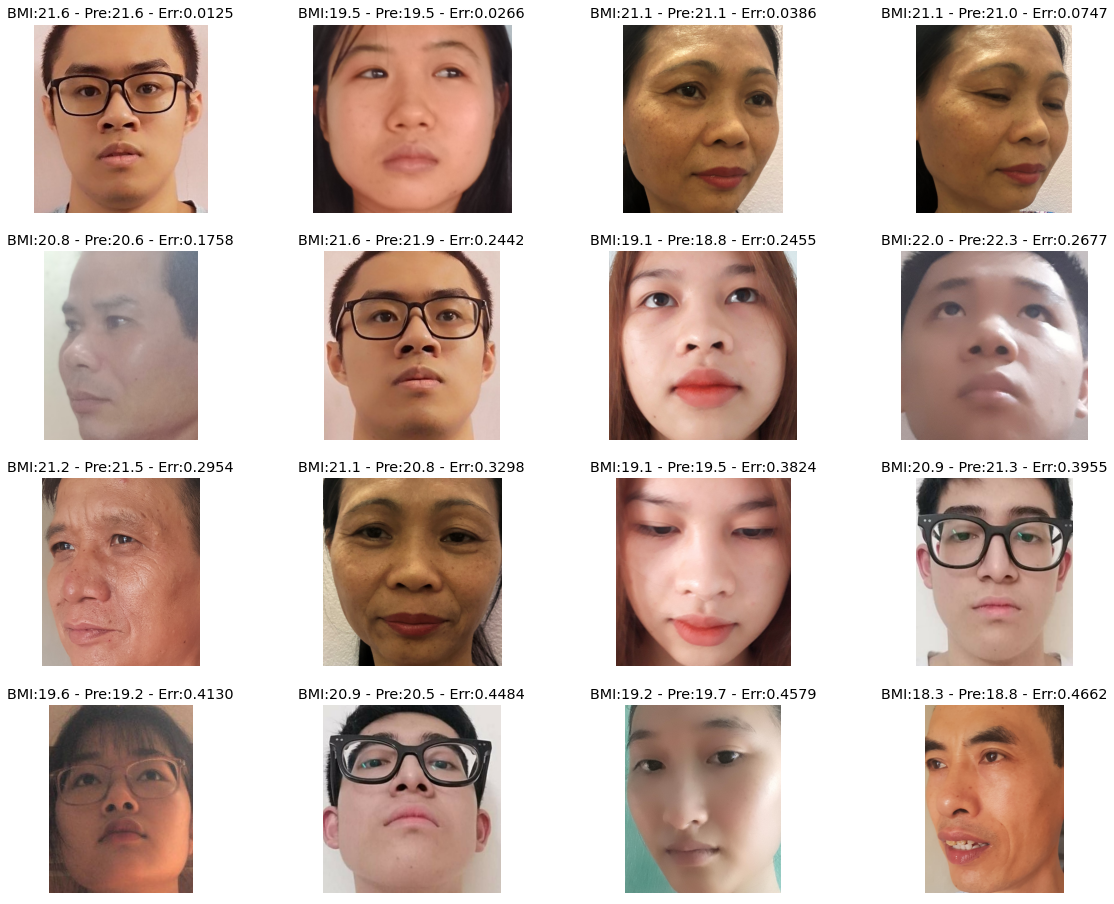

In [12]:
helper.plot_batch_images(batch_size=Config.batch_size, dataframe=best_results, starting_idx=0, columns=['bmi', 'predicted', 'error'])

In [ ]:
helper.plot_batch_images(batch_size=Config.batch_size, dataframe=worst_results, starting_idx=0, columns=['bmi', 'predicted', 'error'])